#k-means法

In [1]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
#乳がんのデータセットの読み込み
cancer = load_breast_cancer()
#データフレームの作成
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
#ターゲットの0をmalignant(悪性)、1をbenign(良性)とする。
df['target'] = cancer.target
df.loc[df['target'] == 0, 'target'] = "malignant"
df.loc[df['target'] == 1, 'target'] = "benign"
#データ表示
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


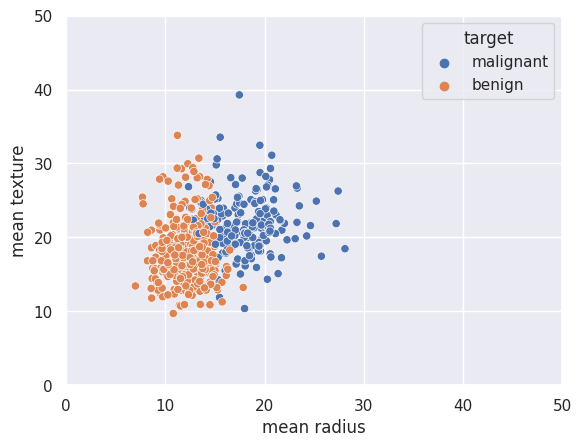

In [3]:
#mean radiusとmean textureを取り出してプロット
sns.scatterplot(data=df, x='mean radius', y='mean texture', hue='target')

plt.xlim(0, 50)
plt.ylim(0, 50);

In [4]:
#入力するデータを用意
X = cancer.data[:,0:2]
#k-means法
kmeans = KMeans(n_clusters=2,n_init=10)
kmeans.fit(X)
#分類結果表示
kmeans.labels_

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [5]:
#ターゲットを分類結果に更新
df["target"] = kmeans.labels_

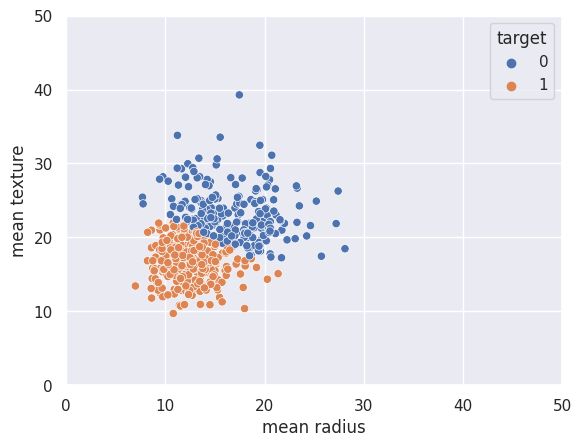

In [6]:
#mean radiusとmean textureのグラフで分類結果を確認
sns.scatterplot(data=df, x='mean radius', y='mean texture', hue='target')
plt.xlim(0, 50)
plt.ylim(0, 50);

In [7]:
#分類結果と正解ラベルを比較
counter=0
for i in range(len(cancer.data)):
  if kmeans.labels_[i]==cancer.target[i]:
    counter+=1
rate=counter*100/len(cancer.target)
print("一致率"+str(rate)+"%")

一致率83.30404217926186%


In [8]:
#入力次元を一つずつ増やす
for i in range(30):
  #入力するデータを用意
  X = cancer.data[:,0:1+i]
  #k-means法
  kmeans = KMeans(n_clusters=2,n_init=10)
  kmeans.fit(X)
  #ターゲットを分類結果に更新
  df["target"] = kmeans.labels_
  #分類結果と正解ラベルを比較
  counter=0
  for j in range(len(cancer.data)):
    if kmeans.labels_[j]==cancer.target[j]:
      counter+=1
  rate=counter*100/len(cancer.target)
  print("0 から",i,"までのときの一致率"+str(rate)+"%")

0 から 0 までのときの一致率14.411247803163445%
0 から 1 までのときの一致率83.30404217926186%
0 から 2 までのときの一致率12.126537785588752%
0 から 3 までのときの一致率16.16871704745167%
0 から 4 までのときの一致率16.16871704745167%
0 から 5 までのときの一致率83.83128295254834%
0 から 6 までのときの一致率16.16871704745167%
0 から 7 までのときの一致率16.16871704745167%
0 から 8 までのときの一致率16.16871704745167%
0 から 9 までのときの一致率83.83128295254834%
0 から 10 までのときの一致率16.16871704745167%
0 から 11 までのときの一致率83.83128295254834%
0 から 12 までのときの一致率16.16871704745167%
0 から 13 までのときの一致率83.47978910369069%
0 から 14 までのときの一致率16.520210896309315%
0 から 15 までのときの一致率16.520210896309315%
0 から 16 までのときの一致率83.47978910369069%
0 から 17 までのときの一致率16.520210896309315%
0 から 18 までのときの一致率16.520210896309315%
0 から 19 までのときの一致率83.47978910369069%
0 から 20 までのときの一致率16.520210896309315%
0 から 21 までのときの一致率16.520210896309315%
0 から 22 までのときの一致率16.520210896309315%
0 から 23 までのときの一致率14.586994727592268%
0 から 24 までのときの一致率14.586994727592268%
0 から 25 までのときの一致率14.586994727592268%
0 から 26 までのときの一致率14.586994727592268%
0 から 27 までのときの一致率14.58699

In [9]:
#入力するデータを用意
X = cancer.data[:,[0,1,2,23]]
#k-means法
kmeans = KMeans(n_clusters=2,n_init=10)
kmeans.fit(X)
#ターゲットを分類結果に更新
df["target"] = kmeans.labels_
#分類結果と正解ラベルを比較
counter=0
for j in range(len(cancer.data)):
  if kmeans.labels_[j]==cancer.target[j]:
    counter+=1
rate=counter*100/len(cancer.target)
print("0 から",i,"までのときの一致率"+str(rate)+"%")

0 から 29 までのときの一致率14.586994727592268%


In [10]:
#入力次元を一つずつずらす
for i in range(28):
  #入力するデータを用意
  X = cancer.data[:,0+i:3+i]
  #k-means法
  kmeans = KMeans(n_clusters=2,n_init=10)
  kmeans.fit(X)
  #ターゲットを分類結果に更新
  df["target"] = kmeans.labels_
  #分類結果と正解ラベルを比較
  counter=0
  for j in range(len(cancer.data)):
    if kmeans.labels_[j]==cancer.target[j]:
      counter+=1
  rate=counter*100/len(cancer.target)
  print(i,"から",i+2,"までのときの一致率"+str(rate)+"%")

0 から 2 までのときの一致率12.478031634446397%
1 から 3 までのときの一致率16.16871704745167%
2 から 4 までのときの一致率83.83128295254834%
3 から 5 までのときの一致率16.16871704745167%
4 から 6 までのときの一致率83.30404217926186%
5 から 7 までのときの一致率85.06151142355009%
6 から 8 までのときの一致率85.41300527240773%
7 から 9 までのときの一致率11.24780316344464%
8 から 10 までのときの一致率23.19859402460457%
9 から 11 までのときの一致率54.83304042179262%
10 から 12 までのときの一致率24.604569420035148%
11 から 13 までのときの一致率24.428822495606326%
12 から 14 までのときの一致率24.428822495606326%
13 から 15 までのときの一致率24.428822495606326%
14 から 16 までのときの一致率34.797891036906854%
15 から 17 までのときの一致率34.797891036906854%
16 から 18 までのときの一致率36.203866432337435%
17 から 19 までのときの一致率39.894551845342704%
18 から 20 までのときの一致率12.302284710017574%
19 から 21 までのときの一致率16.344463971880494%
20 から 22 までのときの一致率10.720562390158172%
21 から 23 までのときの一致率14.586994727592268%
22 から 24 までのときの一致率14.586994727592268%
23 から 25 までのときの一致率85.41300527240773%
24 から 26 までのときの一致率17.223198594024606%
25 から 27 までのときの一致率16.695957820738137%
26 から 28 までのときの一致率14.235500878734623%
27

#主成分分析を行ったk-means法

In [11]:
from sklearn.decomposition import PCA

In [12]:
#データの標準化を行う
dfs = df.iloc[:, :30].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [13]:
#主成分分析
pca = PCA()
pca.fit(dfs)
feature = pca.transform(dfs)

In [14]:
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,9.184755,1.946870,-1.122179,3.630536,-1.194059,1.410184,2.157472,-0.398057,-0.156980,-0.876631,...,0.096430,0.068789,0.084444,-0.175102,-0.150887,-0.201326,-0.252363,-0.033885,0.045608,-0.047128
1,2.385703,-3.764859,-0.528827,1.117281,0.621228,0.028631,0.013346,0.240777,-0.711279,1.106022,...,-0.077259,-0.094495,-0.217527,0.011280,-0.170360,-0.041093,0.181111,0.032596,-0.005682,-0.001866
2,5.728855,-1.074229,-0.551263,0.911281,-0.176930,0.540976,-0.667579,0.097288,0.024044,0.453876,...,0.310793,-0.060256,-0.074226,0.102671,0.171008,0.004731,0.049526,0.046984,0.003143,0.000750
3,7.116691,10.266556,-3.229948,0.152413,-2.958275,3.050737,1.428654,1.058634,-1.404204,-1.115993,...,0.433812,-0.203087,-0.123996,0.153295,0.077428,-0.274983,0.183301,0.042447,-0.069234,-0.019920
4,3.931842,-1.946359,1.388545,2.938054,0.546267,-1.225416,-0.935390,0.635817,-0.263574,0.377372,...,-0.116442,-0.017634,0.139331,-0.005327,0.003059,0.039220,0.032140,-0.034756,0.005033,0.021195


<Axes: >

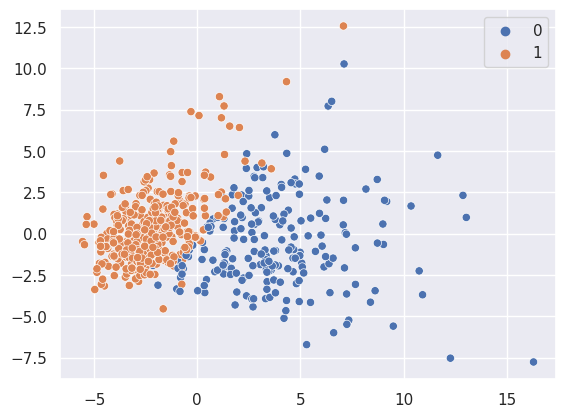

In [15]:
sns.scatterplot( x=feature[:, 0], y=feature[:, 1],hue=cancer.target)

In [16]:
#入力するデータを用意
X = feature[:, 0:1]
#k-means法
kmeans = KMeans(n_clusters=2,n_init=10)
kmeans.fit(X)
#分類結果表示
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

<Axes: >

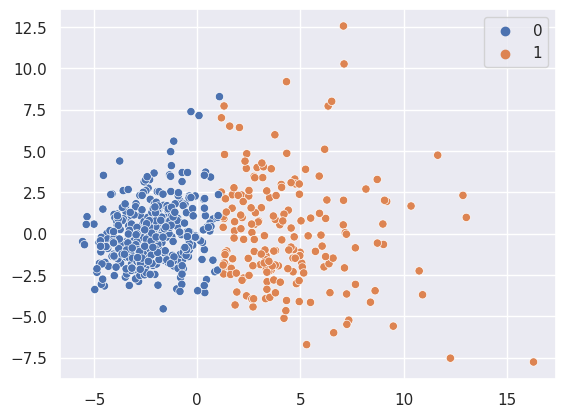

In [17]:
sns.scatterplot( x=feature[:, 0], y=feature[:, 1],hue=kmeans.labels_)

In [18]:
#分類結果と正解ラベルを比較
counter=0
for i in range(len(cancer.data)):
  if kmeans.labels_[i]==cancer.target[i]:
    counter+=1
rate=counter*100/len(cancer.target)
print("一致率"+str(rate)+"%")

一致率9.13884007029877%
